In [ ]:
%%capture
!git clone https://github.com/ultralytics/yolov5.git
!curl -L "https://public.roboflow.com/ds/1BpjFZe9ST?key=KXD7eDvwTa" > roboflow.zip; unzip -o roboflow.zip; rm roboflow.zip
%cd /content/yolov5
!pip install -r requirements.txt
!pip install "wandb==0.12.10"

In [ ]:
import os

# Define the paths to the test and train folders
test_folder = "/content/test/images"
train_folder = "/content/train/images"
valid_folder="/content/valid/images"

# Count the number of image files in the test folder
test_image_count = len([f for f in os.listdir(test_folder) if f.endswith(".jpg")])

# Count the number of image files in the train folder
train_image_count = len([f for f in os.listdir(train_folder) if f.endswith(".jpg")])

# Count the number of image files in thevalid  folder
valid_image_count = len([f for f in os.listdir(valid_folder) if f.endswith(".jpg")])

print(f"Number of images in the test folder: {test_image_count}")
print(f"Number of images in the train folder: {train_image_count}")
print(f"Number of images in the valid folder: {valid_image_count}")

Number of images in the test folder: 29
Number of images in the train folder: 606
Number of images in the valid folder: 58


In [ ]:
#train Yolo Model
!yolo task=detect mode=train model=yolov5s.pt data=/content/data.yaml epochs=100 imgsz=640 plots=True

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save

In [ ]:
#VALIDATION
!yolo task=detect mode=val model=/content/yolov5/runs/detect/train2/weights/best.pt data=/content/data.yaml

Ultralytics YOLOv8.0.203 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5s summary (fused): 193 layers, 9116567 parameters, 0 gradients, 23.9 GFLOPs
val: Scanning /content/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.68s/it]
                   all         58        386      0.974      0.988      0.987      0.813
          black-bishop         58         22          1      0.923      0.967      0.752
            black-king         58         29          1      0.976      0.995      0.867
          black-knight         58         30      0.994          1      0.995      0.828
            black-pawn         58         77      0.996          1      0.995      0.793
           black-queen         58         11      0.873          1      0.995      0.861
            black-rook         58         28      0.992       

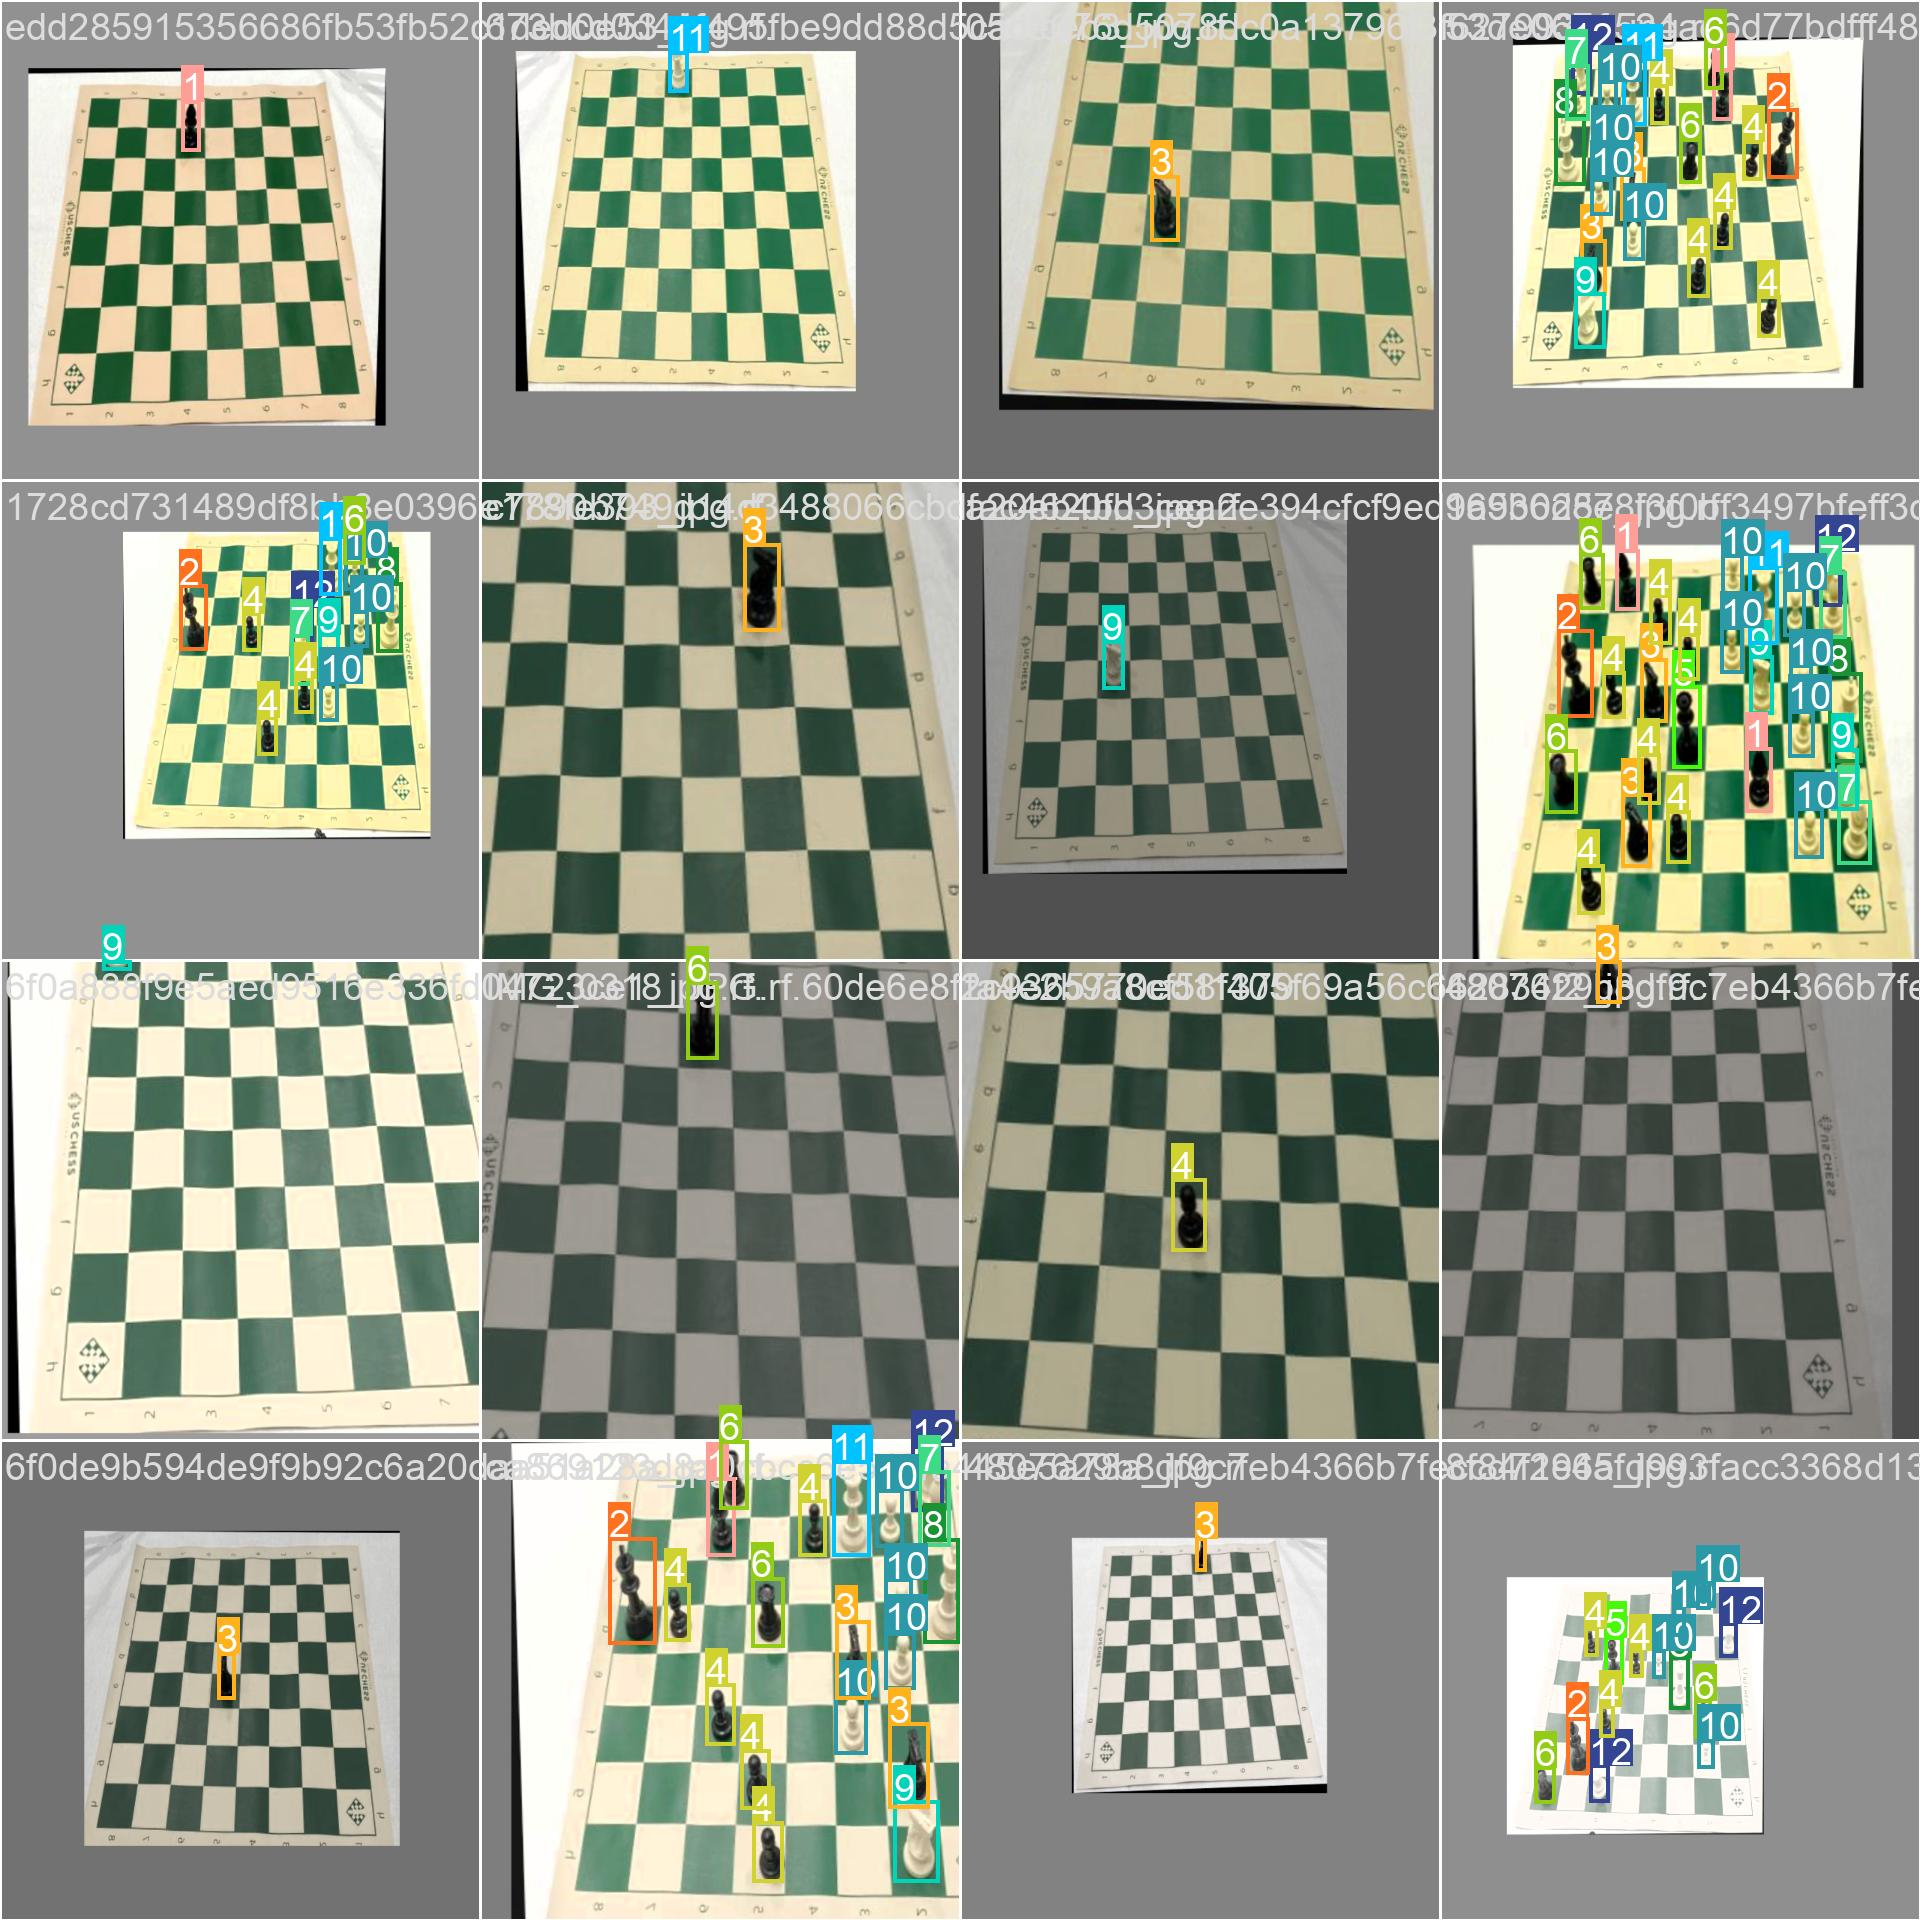

In [ ]:
from IPython.display import Image
Image(filename=f'/content/yolov5/runs/detect/train2/train_batch3420.jpg', width=600)
Image(filename=f'/content/yolov5/runs/detect/train2/train_batch3422.jpg', width=600)

In [ ]:
# import modules

import matplotlib.pyplot as mp

import pandas as pd

import seaborn as sb




# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot

print(data.corr())


# plotting correlation heatmap

dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


# displaying heatmap
mp.show()

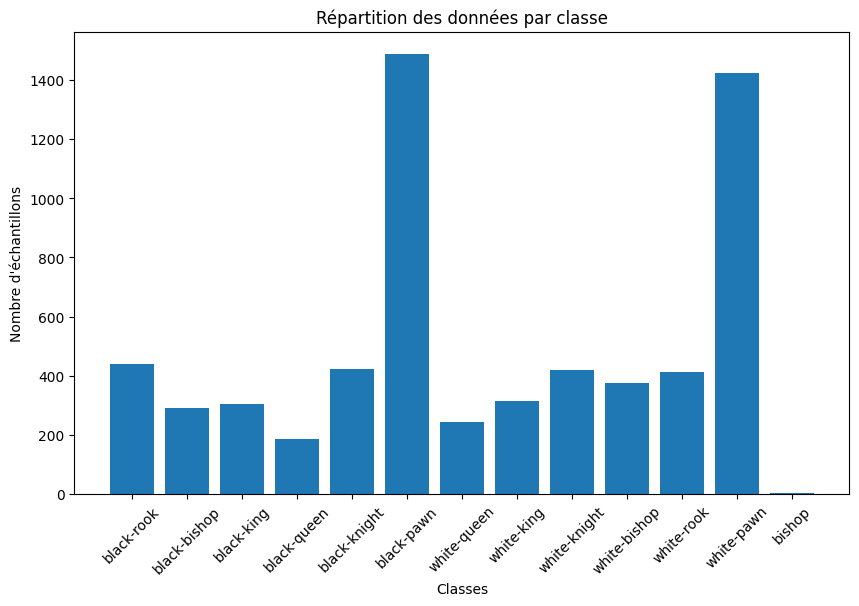

In [ ]:
import os
import matplotlib.pyplot as plt

# Chemin vers le répertoire contenant les fichiers de labels
labels_dir = "/content/train/labels"

# Initialisation d'un dictionnaire pour stocker le compte des classes
class_counts = {}

# Parcourez les fichiers de labels
for root, dirs, files in os.walk(labels_dir):
    for file in files:
        # Lisez le contenu du fichier de label
        with open(os.path.join(root, file), 'r') as label_file:
            lines = label_file.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Obtenez la liste des noms de classes (en supposant que vous les ayez)
class_names = ['bishop','black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']  # Remplacez par vos noms de classes

# Créez des listes pour les noms de classes et les comptes
class_labels = [class_names[class_id] for class_id in class_counts.keys()]
class_counts = list(class_counts.values())

# Tracé du diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('Nombre d\'échantillons')
plt.title('Répartition des données par classe')
plt.xticks(rotation=45)
plt.show()


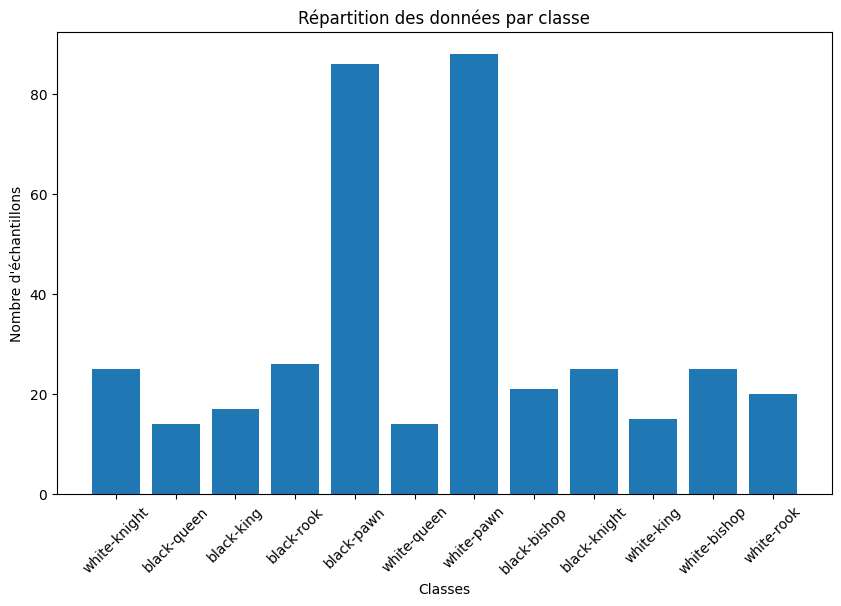

In [ ]:
import os
import matplotlib.pyplot as plt

# Chemin vers le répertoire contenant les fichiers de labels
labels_dir = "/content/test/labels"

# Initialisation d'un dictionnaire pour stocker le compte des classes
class_counts = {}

# Parcourez les fichiers de labels
for root, dirs, files in os.walk(labels_dir):
    for file in files:
        # Lisez le contenu du fichier de label
        with open(os.path.join(root, file), 'r') as label_file:
            lines = label_file.readlines()
            for line in lines:
                class_id = int(line.split()[0])
                class_counts[class_id] = class_counts.get(class_id, 0) + 1

# Obtenez la liste des noms de classes (en supposant que vous les ayez)
class_names = ['bishop','black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']  # Remplacez par vos noms de classes

# Créez des listes pour les noms de classes et les comptes
class_labels = [class_names[class_id] for class_id in class_counts.keys()]
class_counts = list(class_counts.values())

# Tracé du diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Classes')
plt.ylabel('Nombre d\'échantillons')
plt.title('Répartition des données par classe')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r  /content/yolov5 /content/drive/MyDrive/yolov5